In [1]:
from pycaret.classification import *
import pandas as pd

In [2]:
df = pd.read_csv("../features.csv")
df.head()
df = df[df["label"] != "~"]


<AxesSubplot:>

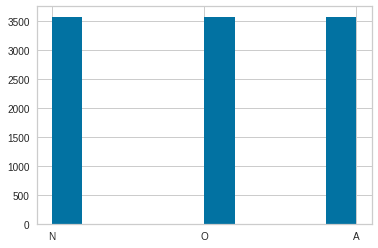

In [3]:
df.label.hist()

In [5]:
config = setup( data = df,
                train_size=0.8,
                target="label",
                use_gpu=True,
                feature_selection=True,
                feature_ratio=True,
                session_id=123)

,Description,Value
0,session_id,123
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,"A: 0, N: 1, O: 2"
4,Original Data,"(10719, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
best_model = compare_models(sort = "F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8818,0.9683,0.8818,0.8811,0.8807,0.8226,0.8233,0.4840
lightgbm,Light Gradient Boosting Machine,0.8714,0.9613,0.8714,0.8712,0.8698,0.8071,0.8084,0.2970
rf,Random Forest Classifier,0.8707,0.9638,0.8707,0.8702,0.8697,0.8060,0.8067,0.6300
gbc,Gradient Boosting Classifier,0.8176,0.9340,0.8178,0.8159,0.8142,0.7264,0.7286,7.0910
dt,Decision Tree Classifier,0.7956,0.8467,0.7956,0.7958,0.7953,0.6933,0.6937,0.0980
knn,K Neighbors Classifier,0.7995,0.9291,0.7995,0.7975,0.7942,0.6993,0.7031,0.2010
ada,Ada Boost Classifier,0.7318,0.7944,0.7322,0.7244,0.7225,0.5978,0.6024,0.5830
lr,Logistic Regression,0.7109,0.8352,0.7113,0.7055,0.7005,0.5665,0.5730,2.6140
lda,Linear Discriminant Analysis,0.6938,0.8407,0.6942,0.6868,0.6822,0.5408,0.5477,0.0390
ridge,Ridge Classifier,0.6906,0.0000,0.6911,0.6935,0.6673,0.5362,0.5547,0.0110


In [7]:
tuned_model = tune_model(best_model, optimize='F1', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8054,0.9402,0.8056,0.8027,0.8003,0.7081,0.7113
1,0.8485,0.9528,0.8488,0.8486,0.8448,0.7728,0.7761
2,0.8275,0.9427,0.8277,0.8253,0.8246,0.7413,0.7429
3,0.8205,0.9428,0.8207,0.8201,0.8182,0.7308,0.7327
4,0.7774,0.9229,0.7776,0.7732,0.7741,0.6661,0.6671
5,0.8016,0.9318,0.8018,0.7997,0.8002,0.7025,0.7029
6,0.8530,0.9506,0.8529,0.8520,0.8516,0.7795,0.7803
7,0.8016,0.9333,0.8016,0.7992,0.7981,0.7025,0.7045
8,0.8180,0.9363,0.8180,0.8157,0.8157,0.7270,0.7280


In [59]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['min_rate', 'avg_rate', 'max_rate', 'sdnn', 'nn50', 'sdsd', 'rmssd']],
                                                    df[["label"]])


model = LGBMClassifier(
    metric="multi_logloss",
    num_leaves=32
)

model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='multi_logloss', min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=32, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [60]:
from sklearn.metrics import f1_score

y_pred = model.predict(X_test)

f1_score(y_test, y_pred, average="weighted")

0.7761828291198503

In [ ]:
model.save()